# Task 1

In [1]:
import csv
import math
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import umap
from sklearn.manifold import TSNE

# Open and parse csv files
trainInFile = open("train_in.csv") 
trainOutFile = open("train_out.csv")
train_in_reader = csv.reader(trainInFile)
train_out_reader = csv.reader(trainOutFile)

# Generate array of all corresponding number values of each vector
ins = [[float(i) for i in line] for line in train_in_reader]
outs = [int(i[0]) for i in train_out_reader]

# Initialise dictionary which will contain all the centers (means)
centers = {"0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": [], "7": [], "8": [], "9": []}

# Calculate the center for each digit
indexNumber = 0
for numVector in ins:
    correspondingNumber = outs[indexNumber]
    if len(centers[str(correspondingNumber)]) == 0:
        centers[str(correspondingNumber)] = numVector
    else:
        for j in range(256):
            centers[str(correspondingNumber)][j] = centers[str(correspondingNumber)][j] + numVector[j]
    indexNumber += 1

for key in centers.keys():
    length = len(centers[key])
    centers[key] = [i/length for i in centers[key]]

# Initialise the distance matrix
dist = [[0 for j in range(10)] for i in range(10)]

# Calculate the Euclidean distance between all the centers
for i in range(10):
    for j in range(10):
        squared = [(centers[str(i)][k] - centers[str(j)][k])**2 for k in range(256)]
        distance = round(math.sqrt(sum(squared)), 3)
        dist[i][j] = distance

for i in dist:
    print(i)

# PCA and Plotting
colorsIndex = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF", "#ab44fe", "#0012b1", "#000000", "#ff12a1"]
colors = [colorsIndex[i] for i in outs]

# Normalize data using Min-Max Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(ins)

# Apply PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

# Apply UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Filter PCA results
mask = (Y[:, 0] <= 1) & (Y[:, 1] <= 1)
Y_filtered = Y[mask]
colors_filtered = np.array(colors)[mask]

# Plot PCA results
axs[0].scatter(Y_filtered[:, 0], Y_filtered[:, 1], c=colors_filtered)
unique_labels = list(set(outs))
legend_handles = [mpatches.Patch(color=colorsIndex[label], label=str(label)) for label in unique_labels]
axs[0].legend(handles=legend_handles, title="Digits")
axs[0].set_title('PCA')

# Plot UMAP results
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=colors)
axs[1].legend(handles=legend_handles, title="Digits")
axs[1].set_title('UMAP')

# Plot t-SNE results
axs[2].scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors)
axs[2].legend(handles=legend_handles, title="Digits")
axs[2].set_title('t-SNE')

# Show the plots
plt.tight_layout()
plt.show()

[0.0, 15.294, 10.537, 10.146, 11.116, 10.502, 9.101, 11.476, 10.52, 11.085]
[15.294, 0.0, 10.345, 11.89, 11.3, 12.54, 10.922, 10.595, 10.86, 10.688]
[10.537, 10.345, 0.0, 5.51, 5.341, 5.893, 4.927, 6.058, 4.852, 5.587]
[10.146, 11.89, 5.51, 0.0, 4.501, 3.355, 5.23, 5.617, 3.809, 4.298]
[11.116, 11.3, 5.341, 4.501, 0.0, 3.704, 4.885, 4.982, 3.93, 3.101]
[10.502, 12.54, 5.893, 3.355, 3.704, 0.0, 4.454, 6.231, 4.105, 4.419]
[9.101, 10.922, 4.927, 5.23, 4.885, 4.454, 0.0, 6.828, 4.973, 5.76]
[11.476, 10.595, 6.058, 5.617, 4.982, 6.231, 6.828, 0.0, 5.37, 3.574]
[10.52, 10.86, 4.852, 3.809, 3.93, 4.105, 4.973, 5.37, 0.0, 3.385]
[11.085, 10.688, 5.587, 4.298, 3.101, 4.419, 5.76, 3.574, 3.385, 0.0]


AttributeError: module 'umap' has no attribute 'UMAP'

# Task 2

Updating weights for sample 0 at epoch 0
Updating weights for sample 1 at epoch 0
Updating weights for sample 3 at epoch 0
Updating weights for sample 4 at epoch 0
Updating weights for sample 5 at epoch 0
Updating weights for sample 6 at epoch 0
Updating weights for sample 7 at epoch 0
Updating weights for sample 8 at epoch 0
Updating weights for sample 9 at epoch 0
Updating weights for sample 10 at epoch 0
Updating weights for sample 11 at epoch 0
Updating weights for sample 12 at epoch 0
Updating weights for sample 13 at epoch 0
Updating weights for sample 14 at epoch 0
Updating weights for sample 15 at epoch 0
Updating weights for sample 16 at epoch 0
Updating weights for sample 17 at epoch 0
Updating weights for sample 18 at epoch 0
Updating weights for sample 19 at epoch 0
Updating weights for sample 20 at epoch 0
Updating weights for sample 21 at epoch 0
Updating weights for sample 22 at epoch 0
Updating weights for sample 23 at epoch 0
Updating weights for sample 24 at epoch 0
U

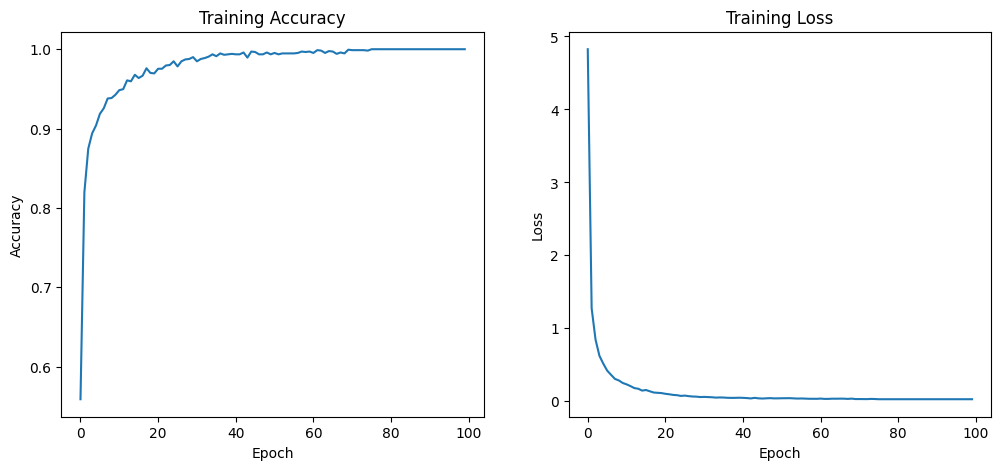

Test Accuracy = 0.83


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training and test data
train_in = np.loadtxt('train_in.csv', delimiter=',')
train_out = np.loadtxt('train_out.csv', delimiter=',').astype(int)
test_in = np.loadtxt('test_in.csv', delimiter=',')
test_out = np.loadtxt('test_out.csv', delimiter=',').astype(int)

# Add bias to the input (both train and test)
train_in = np.hstack((train_in, np.ones((train_in.shape[0], 1))))
test_in = np.hstack((test_in, np.ones((test_in.shape[0], 1))))

# Initialize weights (257 features including bias, 10 classes)
W = np.random.randn(257, 10)

# Define learning rate and number of epochs
alpha = 0.01
num_epochs = 100

# Softmax function to convert logits to probabilities
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Numerical stability
    return exp_z / exp_z.sum(axis=0)

# Cross-entropy loss
def cross_entropy_loss(probs, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(probs[range(m), y_true])
    return np.sum(log_likelihood) / m

# Store accuracy and loss values for plotting
accuracies = []
losses = []

# Perceptron training loop with softmax and cross-entropy
for epoch in range(num_epochs):
    correct = 0
    total_loss = 0

    for i in range(train_in.shape[0]):
        x_i = train_in[i, :]  # Input vector (with bias)
        y_i = train_out[i]    # True label

        # Compute dot product between x_i and weight matrix (logits)
        scores = np.dot(x_i, W)

        # Apply softmax to get probabilities
        probs = softmax(scores)

        # Predict the class with the highest probability
        y_pred = np.argmax(probs)

        # Update weights if prediction is incorrect
        if y_pred != y_i:
            print(f"Updating weights for sample {i} at epoch {epoch}")  # Debugging print statement
            W[:, y_i] += alpha * x_i  # Update correct class
            W[:, y_pred] -= alpha * x_i  # Update incorrect class
        else:
            correct += 1

        # Calculate cross-entropy loss for the current sample
        total_loss += -np.log(probs[y_i])

    # Calculate accuracy for this epoch
    accuracy = correct / train_in.shape[0]
    accuracies.append(accuracy)
    losses.append(total_loss / train_in.shape[0])

    # Print results for the current epoch
    print(f'Epoch {epoch}: Accuracy = {accuracy:.2f}, Loss = {total_loss:.4f}')

# Plot accuracy and loss over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# Testing the model on the test set
correct = 0
for i in range(test_in.shape[0]):
    x_i = test_in[i, :]  # Input vector (with bias)
    y_i = test_out[i]    # True label

    # Compute dot product between x_i and weight matrix
    scores = np.dot(x_i, W)

    # Apply softmax
    probs = softmax(scores)

    # Predict the class with the highest probability
    y_pred = np.argmax(probs)

    if y_pred == y_i:
        correct += 1

# Calculate accuracy on the test set
test_accuracy = correct / test_in.shape[0]
print(f'Test Accuracy = {test_accuracy:.2f}')
